In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gdp-per-country-20202025/2020-2025.csv


# **Global GDP by countries data analysis**

## 1. Introduction
In this notebook, we will analyze the global gdp per country 2020-2025 data set, countries economic growths and declines during these period.

Note: The GDP of each country in the table is in **million dollars**

## 2. Importing Python Libraries

In [2]:
import os
import sys
import matplotlib
#matplotlib.use("Agg")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# List of versions of the various libraries
print("Matplotlib version: ",matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)

# list all folders in the input directory
print(os.listdir("/kaggle/input"))
print(os.listdir("/kaggle/input/gdp-per-country-20202025"))

Matplotlib version:  3.7.2
Seaborn version: 0.12.2
Numpy version: 1.26.4
Pandas version: 2.2.3
['gdp-per-country-20202025']
['2020-2025.csv']


## 3. Loading the Dataset and data overview

In [3]:
# Loading the data
df = pd.read_csv("/kaggle/input/gdp-per-country-20202025/2020-2025.csv")

# Print the first five rows of the table
print(df.head())
print()

# prints some information about the columns in the dataset
print(df.info())
print()

# prints some satistical information about the dataset
print(df.describe())

       Country    2020      2021      2022      2023      2024      2025
0  Afghanistan   20136   14278.0   14501.0   17248.0       NaN       NaN
1      Albania   15271   18086.0   19185.0   23388.0   27259.0   28372.0
2      Algeria  164774  185850.0  225709.0  247789.0  264913.0  268885.0
3      Andorra    2885    3325.0    3376.0    3786.0    4038.0    4035.0
4       Angola   66521   84375.0  142442.0  109764.0  115946.0  113343.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB
None

               2020          2021          202

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


**My Analysis**
* The table has 196 rows that are indexed 0 -195
* The table has 7 columns which are: Country, 2020, 2021, 2022, 2023, 2024, 2025
* 

## 4. Cleaning the Data

### 4.1 Checking for null values or duplicated rows

In [4]:
# Cleaning the data
pd.options.display.max_rows = 1000
#print(df.isnull())
print(df.isnull().sum())
print(df.duplicated().sum())

Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64
0


 **My Analysis**
* The country column has 0 null values
* The 2020 column has 0 null values
* The 2021 column has 2 null values
* The 2022 column has 2 null values
* The 2023 column has 2 null values
* The 2024 column has 4 null values
* The 2025 column has 7 null values
* The table doesn't have any duplicated rows

### 4.2 Replacing null values with median global GDP for each year

In [5]:
median_2021 = df['2021'].median()
median_2022 = df['2022'].median()
median_2023 = df['2023'].median()
median_2024 = df['2024'].median()
median_2025 = df['2025'].median()

df.fillna({'2021': median_2021, '2022': median_2022, '2023': median_2023, '2024': median_2024, '2025': median_2025}, inplace = True)
#print(df)

## 5. Exploring the Data

### 5.1 Total Global GDP from 2020 to 2025

In [6]:
glob2020 = df["2020"].sum()
glob2021 = df["2021"].sum()
glob2022 = df["2022"].sum()
glob2023 = df["2023"].sum()
glob2024 = df["2024"].sum()
glob2025 = df["2025"].sum()
print("Global GDP 2020: " + str(glob2020) + " million dollars")
print("Global GDP 2021: " + str(glob2021) + " million dollars")
print("Global GDP 2022: " + str(glob2022) + " million dollars")
print("Global GDP 2023: " + str(glob2023) + " million dollars")
print("Global GDP 2024: " + str(glob2024) + " million dollars")
print("Global GDP 2025: " + str(glob2025) + " million dollars")

Global GDP 2020: 85826173 million dollars
Global GDP 2021: 97919423.0 million dollars
Global GDP 2022: 102031374.0 million dollars
Global GDP 2023: 106519015.0 million dollars
Global GDP 2024: 110720460.0 million dollars
Global GDP 2025: 113572537.0 million dollars


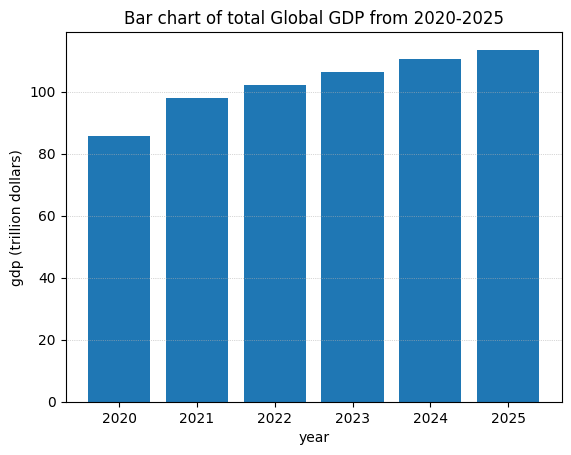

<Figure size 640x480 with 0 Axes>

In [7]:
# Visualization using matplotlib
year = np.array([2020, 2021, 2022, 2023, 2024, 2025])
gdp = np.array([85.826173, 97.919423, 102.031374, 106.519015, 110.720460, 113.572537])
plt.bar(year, gdp)
plt.title("Bar chart of total Global GDP from 2020-2025")
plt.xlabel("year")
plt.ylabel("gdp (trillion dollars)")
plt.grid(axis="y", linestyle="dotted", linewidth=0.5)

plt.show()
plt.savefig("globalgdp20202025.jpg")

**My Analysis**
* Global GDP year 2020: **85.826173 trillion dollars**
* Global GDP year 2021: **97.919423 trillion dollars**
* Global GDP year 2022: **102.031374 trillion dollars**
* Global GDP year 2023: **106.519015 trillion dollars**
* Global GDP year 2024: **110.720460 trillion dollars**
* Global GDP year 2025: **113.572537 trillion dollars**

There have been a constant global GDP growth from 2020-2025

### 5.2 Countries with the highest GDP in 2020, 2022 and 2024

In [8]:
# Country with Highest GDP in 2020
x = df["2020"].max()
print(x)
for i in df.index:
    if df.loc[i, "2020"] == x:
        print(df.loc[i, 'Country'])

# Country with highest GDP in 2022
y = df["2022"].max()
print(df[df["2022"] == y][["Country", "2022"]])

# Country with the highest GDP in 2024
z = df["2024"].max()
print(z)
for i in df.index:
    if df.loc[i, "2024"] == z:
        print(df.loc[i, "Country"])

21354125
United States
           Country        2022
186  United States  26006900.0
29184900.0
United States


**My Analysis**
* The country with the highest GDP in **2020** is the **United States** with a GDP of **21.354125 trillion dollars**
* The country with the highest GDP in **2022** is the **United States** with a GDP of **26.006900 trillion dollars**
* The country with the highest GDP in **2024** is the **United States** with a GDP of **29.184900 trillion dollars**

The United States has remained the country with the highest GDP in these years

### 5.3 Countries with the the second highest GDP in 2020, 2022 and 2024

In [9]:
df1 = df[["Country", "2020"]].sort_values(by="2020", ascending=False)
print(df1.head(2))
print()
df2 = df[["Country", "2022"]].sort_values(by="2022", ascending=False)
print(df2.head(2))
print()
df3 = df[["Country", "2024"]].sort_values(by="2024", ascending=False)
print(df3.head(2))
                                         

           Country      2020
186  United States  21354125
36           China  15103357

           Country        2022
186  United States  26006900.0
36           China  18307816.0

           Country        2024
186  United States  29184900.0
36           China  18748009.0


**My Analysis**
* The country with the second highest GDP in **2020** is **China**, with a GDP of **15.103357 trillion dollars**
* The country with the second highest GDP in **2022** is **China**, with a GDP of **18.307816 trillion dollars**
* The country with the second highest GDP in **2024** is **China**, with a GDP of **18.748009 trillion dollars**

### 5.4 Visualization of US and China GDP in these years

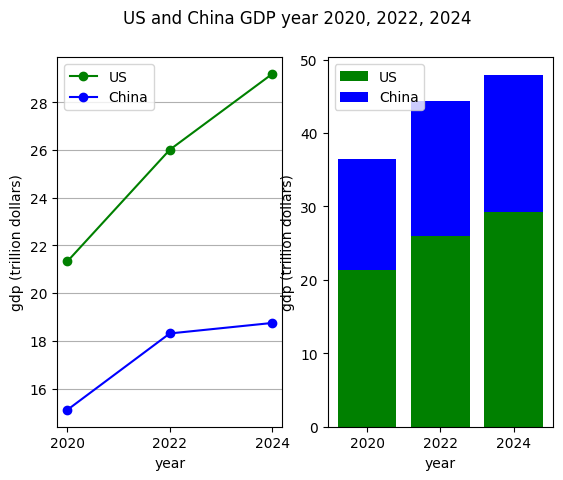

In [10]:
x = np.array(["2020", "2022", "2024"])
y1 = np.array([21.324125, 26.006900, 29.184900])
y2 = np.array([15.103357, 18.307816, 18.748009])

plt.suptitle("US and China GDP year 2020, 2022, 2024")

plt.subplot(1, 2, 1)
plt.plot(x, y1, color="green", marker="o", label="US")
plt.plot(x, y2, color="blue", marker="o", label="China")
plt.xlabel("year")
plt.ylabel("gdp (trillion dollars)")
plt.grid(axis="y")
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(x, y1, color="green", label="US")
plt.bar(x, y2, bottom=y1, color="blue", label="China")
plt.xlabel("year")
plt.ylabel("gdp (trillion dollars)")
plt.legend()

plt.show()

### 5.5 Countries with the Lowest GDP in 2020, 2022, 2024

In [11]:
# Country with the lowest GDP in 2020
df4 = df[["Country", "2020"]].sort_values(by="2020", ascending=True)
print(df4.head(1))

#Country with the lowest GDP in 2022
df5 = df[["Country", "2022"]].sort_values(by="2022", ascending=True)
print(df5.head(1))

# Country with the lowest GDP in 2024
df6 = df[["Country", "2024"]].sort_values(by="2024", ascending=True)
print(df6.head(1))

    Country  2020
181  Tuvalu    52
    Country  2022
181  Tuvalu  61.0
    Country  2024
181  Tuvalu  65.0


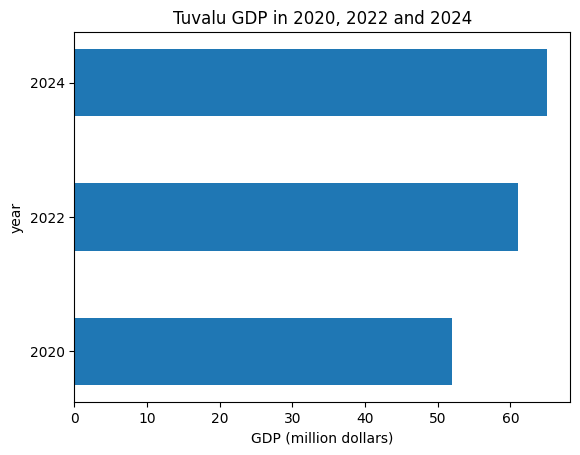

<Figure size 640x480 with 0 Axes>

In [12]:
x = np.array(["2020", "2022", "2024"])
y = np.array([52, 61, 65])
plt.barh(x, y, height=.5)
plt.title("Tuvalu GDP in 2020, 2022 and 2024")
plt.ylabel("year")
plt.xlabel("GDP (million dollars)")

plt.show()
plt.savefig("tuvalu_gdp.jpg")

**My Analysis**
* The country with the lowest GDP in 2020 is **Tavalu**, with a GDP of **52 million dollars**
* The country with the lowest GDP in 2022 is **Tavalu**, with a GDP of **61 million dollars**
* The country with the lowest GDP in 2024 is **Tavalu**, with a GDP of **65 million dollars**

**Tavalu** has remained the lowest GDP in these years

### 5.6 Top 10 countries by GDP 2025

In [13]:
# Top ten by GDP 2025
dfs = df[["Country", "2025"]].sort_values(by="2025", ascending=False)
print(dfs.head(10))

            Country        2025
186   United States  30507217.0
36            China  19231705.0
64          Germany   4744804.0
77            India   4187017.0
85            Japan   4186431.0
185  United Kingdom   3839180.0
60           France   3211292.0
83            Italy   2422855.0
32           Canada   2225341.0
24           Brazil   2125958.0


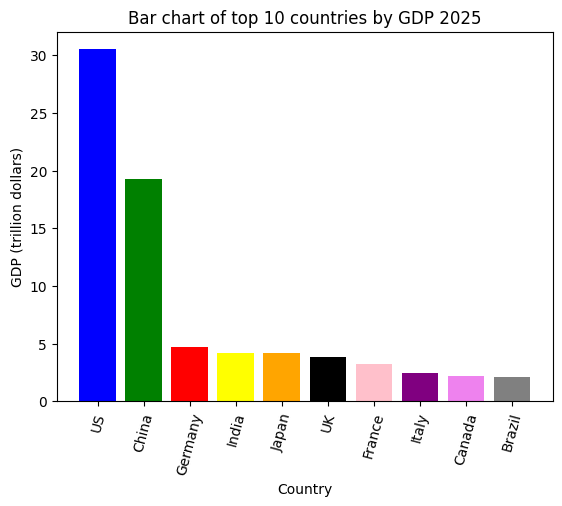

<Figure size 640x480 with 0 Axes>

In [14]:
# Visualization with matplotlib
x = np.array(["US", "China","Germany","India","Japan","UK","France","Italy","Canada","Brazil"])
y = np.array([30.507217,19.231705,4.744804,4.187017,4.186431,3.839180,3.211292,2.422855,2.225341,2.125958])
colors = np.array(["blue","green","red", "yellow", "orange", "black", "pink", "purple", "violet", "grey"])

plt.bar(x, y, color=colors)
plt.title("Bar chart of top 10 countries by GDP 2025")
plt.xlabel("Country")
plt.ylabel("GDP (trillion dollars)")
plt.xticks(rotation=75)

plt.show()
plt.savefig("top10.jpg")

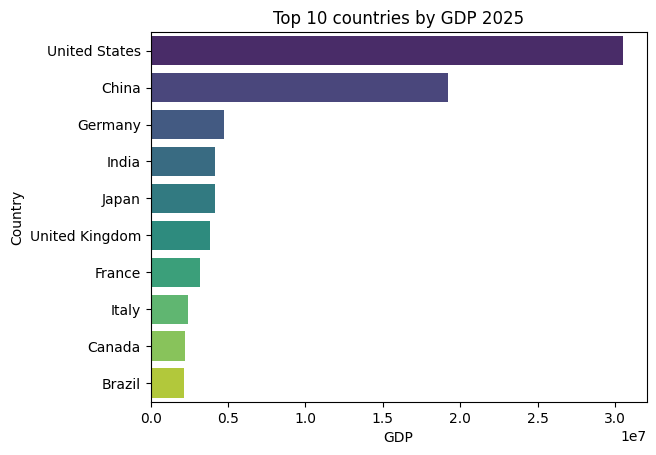

In [15]:
# Visualization with seaborn
top10 = df.nlargest(10, "2025")
#print(top10)

sns.barplot(x="2025", y="Country", data=top10, palette="viridis")
plt.title("Top 10 countries by GDP 2025")
plt.xlabel("GDP")
plt.ylabel("Country")

plt.show()

**My Analysis**

The top 10 countries by GDP 2025 are:
1. US (30.507217 trillion dollars)
2. China (19.231795 trillion dollars)
3. Germany (4.744804 trillion dollars)
4. India (4.187017 trillion dollars)
5. Japan (4.186431 trillion dollars)
6. UK (3.839180 trillion dollars)
7. France (3.211292 trillion dollars)
8. Italy (2.422855 trillion dollars)
9. Canada (2.225341 trillion dollars)
10. Brazil (2.125958 trillion dollars

### 5.7 Top 10 countries with the fastest GDP growth between 2020-2025

In [16]:
df["percent"] = ((df["2025"] - df["2020"]) * 100)/ df["2020"]
#print(df[["Country", "2020", "2025", "percent"]].head())
dfgr = df[["Country", "percent"]].sort_values(by="percent", ascending=False)
print(dfgr.head(10))

         Country      percent
54       Eritrea  2313.168517
71        Guyana   371.979528
192    Palestine   207.938450
190    Venezuela   153.305476
93    Kyrgyzstan   139.635398
0    Afghanistan   137.529797
72         Haiti   131.237938
63       Georgia   120.776869
28       Burundi   118.355455
69        Guinea   113.599262


[2313.16851665  371.97952842  207.93844965  153.30547645  139.6353978
  137.52979738  131.23793769  120.77686879  118.35545484  113.59926184]
['Eritrea' 'Guyana' 'Palestine' 'Venezuela' 'Kyrgyzstan' 'Afghanistan'
 'Haiti' 'Georgia' 'Burundi' 'Guinea']


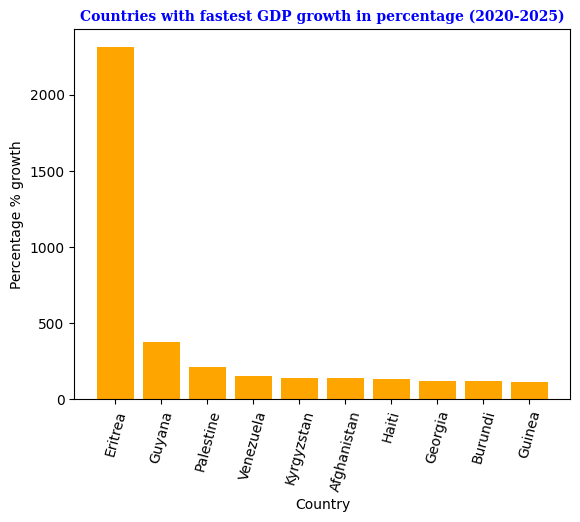

In [19]:
# Visualization with Matplotlib
w = []
for i in dfgr.head(10)["percent"]:
    w.append(i)
y = np.array(w)

z = []
for j in dfgr.head(10)["Country"]:
    z.append(j)
x = np.array(z)

font1 = {"family":"serif", "color":"blue", "size":10, "weight":"bold"}
print(y)
print(x)

plt.bar(x, y, color="orange")
plt.title("Countries with fastest GDP growth in percentage (2020-2025)", fontdict=font1)
plt.xlabel("Country")
plt.ylabel("Percentage % growth")
plt.xticks(rotation=75)

plt.show()

**My analysis**

**The top 10 countries with the fastest GDP growth between 2020-2025 are:**
* Eritrea
* Guyana
* Palestine
* Venezuela
* Kyrgyzstan
* Afghanistan
* Haiti
* Georgia
* Burundi
* Guinea

### 5.8 Countries with negative or stagnant GDP growth between 2020-2025

In [18]:
dfmin = df[df["percent"] <= 0][["Country", "percent"]]
print(dfmin)

         Country    percent
51         Egypt  -9.197569
85         Japan -17.167118
94          Laos -11.825401
119      Myanmar  -1.046761
127      Nigeria -56.448893
131     Pakistan -84.078759
159  South Sudan -26.276968
161    Sri Lanka -43.266037
165        Sudan -10.588302
169        Syria -20.342088
174  Timor-Leste  -2.219140
193        Yemen -13.941642


**My Analysis**

**Countries with negative or stagnant GDP growth between 2020-2025 are:**
* Egypt (-9.20 %)
* Japan (-17.17 %)
* Laos (-11.83 %)
* Myanmar (-1.05 %)
* Nigeria (-56.45 %)
* Pakistan (-84.08 %)
* South Sudan (-26.28 %)
* Sri Lanka (-43.27 %)
* Sudan (-10.59 %)
* Syria (-20.34 %)
* Timor-Leste (-2.22 %)
* Yemen (-13.94 %)